# **Lab 9: Imágenes. Transformaciones punto a punto y transformaciones espaciales geométricas**

Bibliotecas necesarias:

In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import rotate  #para rotar 
import sympy #para visualizar la matriz

### Histograma y Transformaciones punto a punto

## **Transformaciones punto a punto.**

Mejora punto a punto, Transformamos el nivel de gris de cada pixel con la misma trasformación 

- $r \rightarrow$ intensidad original, intensidad de un pixel de la imagen **in** o entrada, original
-$s=T(r) \rightarrow$ intensidad transformada por $T$, intensidad del pixel de la imagen **out** o salida

Capitulo 6.2 del laboratorio

Leemos la imagen: 'Ortopantomografía.jpg' como monocroma

In [4]:
panoramica=cv2.imread('Ortopantomografia.jpg',0)
print(panoramica.shape)

(267, 438)




Muestre  la imagen  y calcule su rango dinámico.

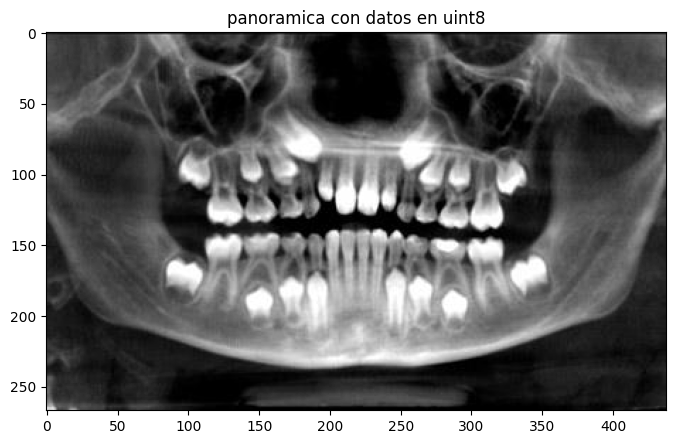

In [5]:
plt.figure(figsize=(8,5))
plt.imshow(panoramica,cmap='gray'), plt.title('panoramica con datos en uint8')
plt.show()

In [6]:
#rango dinámico
print('mínimo',np.amin(panoramica),'máximo', np.amax(panoramica))
print(panoramica.dtype)

mínimo 0 máximo 255
uint8


In [7]:
#Cambiamos de uint8 a float64 para que??
pano_f= (panoramica/np.amax(panoramica)).astype(np.float64)
print('mínimo',np.amin(pano_f),'máximo', np.amax(pano_f))

mínimo 0.0 máximo 1.0


## Realice una <mark>transformación logarítmica</mark> (punto a punto)

$T(r)=c \cdot log(1 + abs(r))$, donde r es la intensidad de un pixel cualquiera

Elija un c y luego pruebe con otros y calcule el rango dinámico de la imagen transformada.

mínimo 0.0 máximo 0.9357486937559262


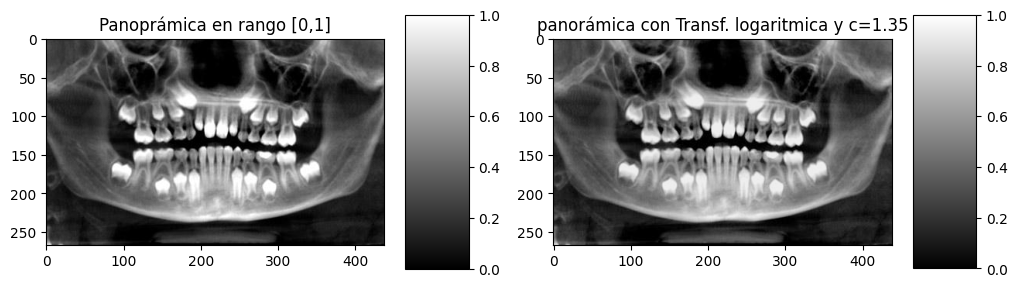

In [8]:
c=1.35

panolog_c = c* np.log(1 + abs(pano_f)) # se suma 1 para que no quede log de 0 -> indeterminado
print('mínimo',np.amin(panolog_c),'máximo', np.amax(panolog_c))

plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(pano_f,cmap='gray'), plt.title('Panoprámica en rango [0,1]')
plt.colorbar(aspect=4)
plt.subplot(122),plt.imshow(panolog_c,cmap='gray',vmin=0,vmax=1), plt.title('panorámica con Transf. logaritmica y c=' + str(c))
plt.colorbar(aspect=4)
plt.show()

## Binarización por Umbralizado
A partir de un determinado umbral, llevo todo a 0 o todo a 1 ($\forall$ pixel en el umbral)
Ojo que tmb puede ser llevar a 0 o a 255.
* Primero se define un valor de corte llamado $umbral$, con algún criterio (arbitrario, 127, media, etc.)
 $$T(r)=\left\{
\begin{array}{lr}
  1& r\geq umbral\\
    0& r<umbral\\   
\end{array}
\right.$$
​
*O su negativo:
​
$$T(r)=\left\{
\begin{array}{lr}
  0& r\geq umbral\\
    1& r<umbral\\   
\end{array}
\right.$$
​
​
​
​
* Se puede generalizar a segmentación por umbralizado (varios umbrales, por ejemplo MultiOtsu)

**Inspecione el histograma de la imagen y elija un valor de umbral para binarizar la imagen (selección manual/arbitraria)**

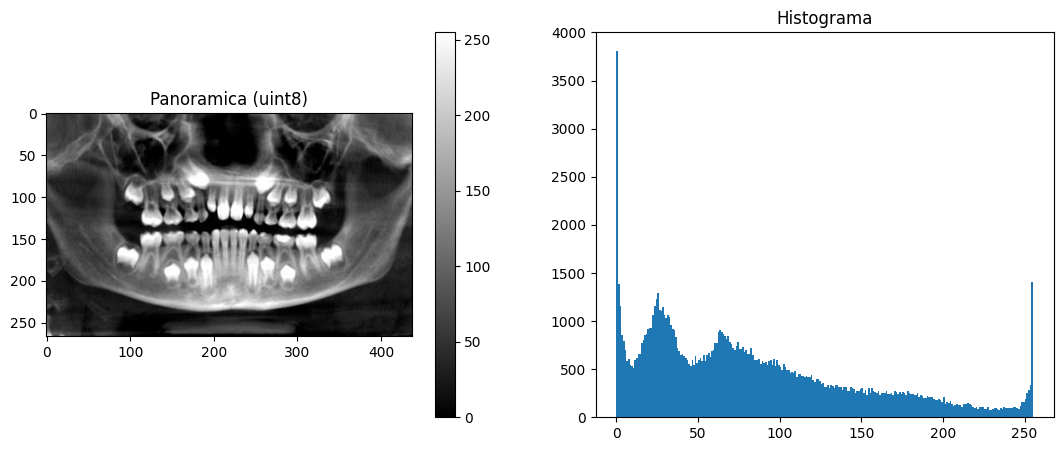

In [15]:
plt.figure(figsize=(13,5))
plt.subplot(121),plt.imshow(panoramica,cmap='gray'), plt.title('Panoramica (uint8)')
plt. colorbar()
plt.subplot(122),plt.hist(np.ravel(panoramica),bins=255), plt.title('Histograma')
plt.show()

In [42]:
umbral=int(input('ingrese un valor de umbral entre 0 y 255: ')) # a partir de aca vamos a hacer o todo negro o todo blanco
print(type(umbral))

<class 'int'>


**Obtenemos la imagen binaria resultante de utilizar el umbral elegido por el usuario y la mostramos**

In [29]:
binaria=(panoramica>=umbral) # esto devuelve un booleano y lo guardamos en cada uno de los lugares
binaria_u=(panoramica>=umbral).astype('uint8') #arreglo de booleanos /uint8 => paso de True/False a 1 y 0
# binaria es lo mismo que binaria_u solo que con distintos tipos de datos

print(binaria.dtype) #que tipo de dato tiene la matriz binaria y que tipo la binaria_u?
print(binaria)
print(binaria_u.dtype) #que tipo de dato tiene la matriz binaria y que tipo la binaria_u?
print(binaria_u)

bool
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


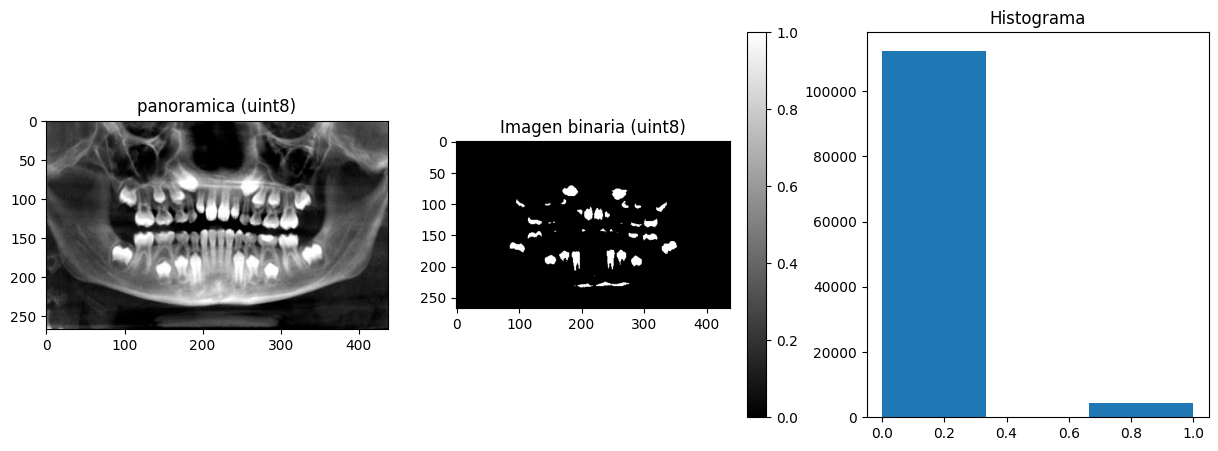

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(panoramica,cmap='gray')
plt.title('panoramica (uint8)')

plt.subplot(132)
plt.imshow(binaria_u,cmap='gray')
plt.title('Imagen binaria (uint8)')

plt.subplot(133)
plt.hist(np.ravel(binaria_u),bins=3)
plt.title('Histograma')

plt.colorbar()
plt.show()

<span style='background:red;color:white;'>**⚠️ EJERCICIO:** Probar ver solamente la dentadura. Ir variando parametros hasta verlos. Ejercicio de examen. **JUSTIFICAR EL POR QUE DE ELECCIONES. IMPORTANTE PARA EL PROX. PARCIAL.**</span>

Con un valor de 35 se logran ver las piezas dentales bien.

Utilizamos la función **threshold** de cv2
Para binarizar por umbral "T"

* Todos los píxeles que tengan un valor mayor a T pasan a ser 255
* Todos los píxeles que tengan un valor menor a T pasan a ser 0

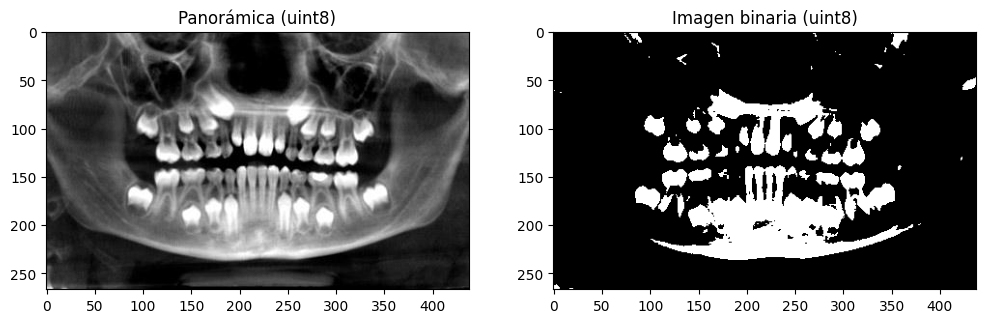

uint8
255


In [44]:
umbral1, binaria2 = cv2.threshold(panoramica,umbral,255,cv2.THRESH_BINARY)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(panoramica,cmap='gray')
plt.title('Panorámica (uint8)')

plt.subplot(122)
plt.imshow(binaria2,cmap='gray')
plt.title('Imagen binaria (uint8)')

plt.show()

print(binaria2.dtype)
print(binaria2.max())

umbral: 0.3 tipo de dato: float64


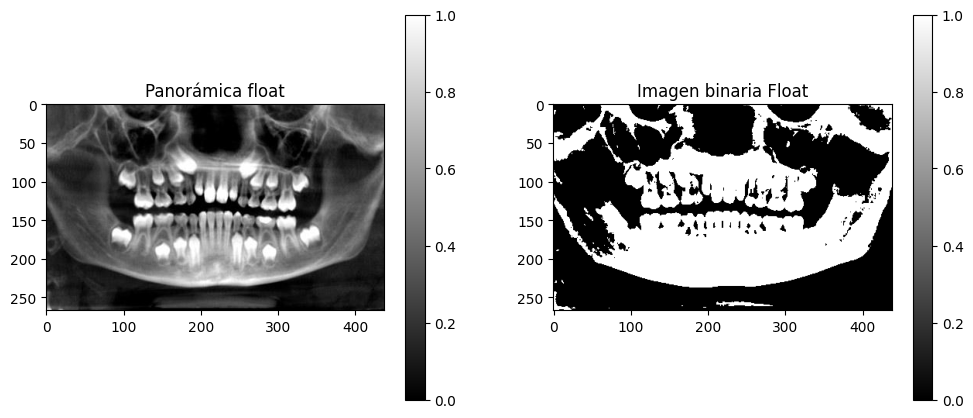

In [45]:
umbral_f=0.3
umbral2, binaria3 = cv2.threshold(pano_f,umbral_f,1,cv2.THRESH_BINARY)
print('umbral:', umbral2, 'tipo de dato:', binaria3.dtype)
plt.figure(figsize=(12,5))
plt.subplot(121),plt.imshow(pano_f,cmap='gray'), plt.title('Panorámica float')
plt.colorbar()
plt.subplot(122),plt.imshow(binaria3,cmap='gray'), plt.title('Imagen binaria Float')
plt.colorbar()
plt.show()


## Ajuste Gamma

$0\leq r \leq 1$            
$T(r)=r^\gamma$ Función gamma 

* $\gamma >1$ oscurece 
*$\gamma < 1$ aclara

Aclarar u oscurecer la imagen sin cambiar el rango dinámico

Definimos la función imadjust

In [46]:
def imadjust(img, In=(0,1.0), Out=(0,1.0), gamma=1.0): # los valores igualados son los valores por defecto
                                                       # si le pongo otros valores, toma esos como parametros
    "J = low_out +(high_out - low_out).* ((I - low_in)/(high_in - low_in)).^ gamma"
    low_in,high_in = In
    low_out, high_out = Out
 
    low_in *= 255.0
    high_in *= 255.0
 
    low_out *= 255.0
    high_out *= 255.0    
    
    k = (high_out - low_out) / (high_in - low_in)
         # Gamma transformation table
    table = np.array([((i / 255.0) ** gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    h,w = img.shape[:2]
    imgOut = np.zeros((h,w), np.uint8)
    
    for r in range(h):
        for c in range(w):
            if img[r,c] <= low_in:
                imgOut[r,c] = low_out                
            elif img[r,c] > high_in:
                imgOut[r,c] = high_out
            else:
                res = int(k*(img[r,c]-low_in) + low_out)
                imgOut[r,c] = table[res]#Check table
               
    return imgOut

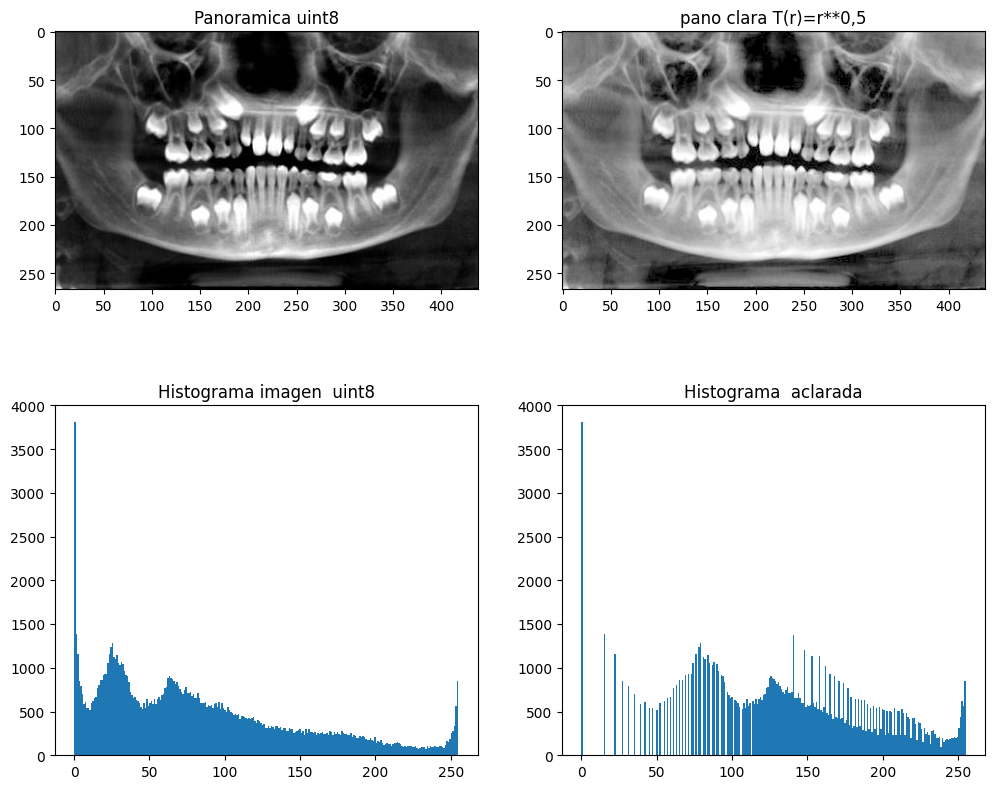

In [56]:
gamma = 0.5
pano_clara=imadjust(panoramica,(0,1),(0,1), gamma) #gamma=0.2 <1 aclara
#los parámetros (0,1) indica el rango dinámico de la imagen de entrada, y el (0,1) el de salida

plt.figure(figsize=(12,10))
plt.subplot(221)
plt.imshow(panoramica,cmap='gray')
plt.title('Panoramica uint8')

plt.subplot(222)
plt.imshow(pano_clara,cmap='gray')
plt.title('pano clara T(r)=r**0,5')

plt.subplot(223)
plt.hist(np.ravel(panoramica),bins=256)
plt.title('Histograma imagen  uint8')

plt.subplot(224)
plt.hist(np.ravel(pano_clara),bins=256)
plt.title('Histograma  aclarada')

plt.show()

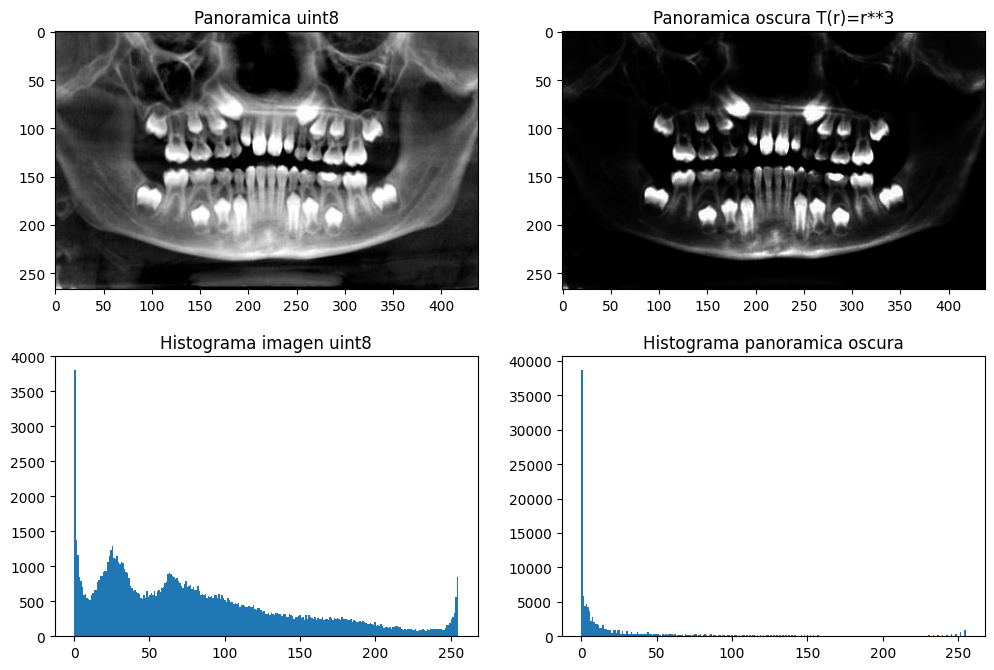

In [57]:
pano_oscura=imadjust(panoramica,(0,1),(0,1), 3) #gamma=3>1 oscurece

plt.figure(figsize=(12,8))
plt.subplot(221),plt.imshow(panoramica,cmap='gray'), plt.title('Panoramica uint8')
plt.subplot(222),plt.imshow(pano_oscura,cmap='gray'), plt.title('Panoramica oscura T(r)=r**3')
plt.subplot(223),plt.hist(np.ravel(panoramica),bins=256), plt.title('Histograma imagen uint8')
plt.subplot(224),plt.hist(np.ravel(pano_oscura),bins=256), plt.title('Histograma panoramica oscura')
plt.show()

mínimo 76 máximo 204


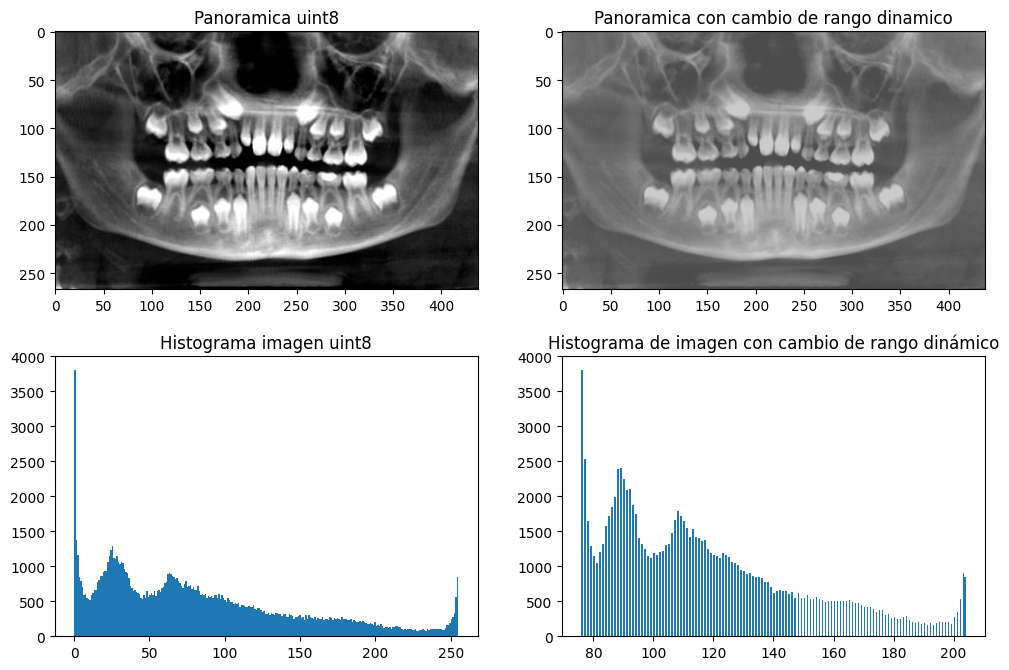

In [58]:
#Cambiamos el rango dinamico de la panoramica, con ajuste lineal de los valores intermedios.
pano3=imadjust(panoramica,(0,1),(0.3,0.8), 1) #gamma=1 ajuste lineal

#miramos el rango dinamico
print('mínimo',np.amin(pano3),'máximo', np.amax(pano3))

plt.figure(figsize=(12,8))
plt.subplot(221),plt.imshow(panoramica,cmap='gray'), plt.title('Panoramica uint8')
plt.subplot(222),plt.imshow(pano3,cmap='gray',vmin=0,vmax=255), plt.title('Panoramica con cambio de rango dinamico')
plt.subplot(223),plt.hist(np.ravel(panoramica),bins=256), plt.title('Histograma imagen uint8')
plt.subplot(224),plt.hist(np.ravel(pano3),bins=256), plt.title('Histograma de imagen con cambio de rango dinámico')
plt.show()

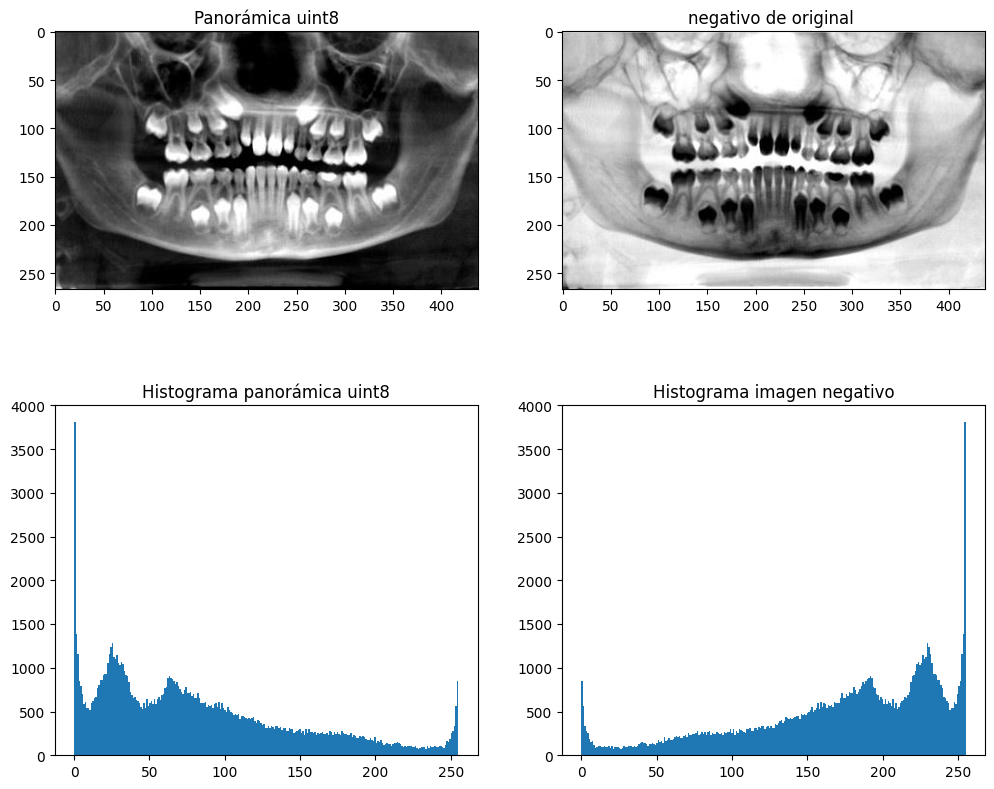

In [59]:
# Calculamos su negativo con imadjust 0<=r<=1 ... T(r)=1-r
pano_neg= imadjust(panoramica,(0,1),(1,0), 1)

plt.figure(figsize=(12,10))
plt.subplot(221)
plt.imshow(panoramica,cmap='gray')
plt.title('Panorámica uint8')

plt.subplot(222)
plt.imshow(pano_neg,cmap='gray')
plt.title('negativo de original ')

plt.subplot(223)
plt.hist(np.ravel(panoramica),bins=256)
plt.title('Histograma panorámica uint8')

plt.subplot(224)
plt.hist(np.ravel(pano_neg),bins=256)
plt.title('Histograma imagen negativo')

plt.show()

# Segunda Parte

In [61]:
import SimpleITK as sitk #importamos esa librería
import pydicom # libreria para leer archivos dicom

# Leemos una imagen en formato **DICOM**

In [64]:
nombre_archivo='SYN00004' #mamografía en formato DICOM
imagen=sitk.ReadImage(nombre_archivo) #guardamos el archivo en una variable
# print(imagen.dtype) no funciona el tipico dtype que usabamos antes
print(type(imagen)) #que forma usamos para averiguar el tipo de dato? qué tipo de dato es?

<class 'SimpleITK.SimpleITK.Image'>


**Pasamos a arreglo numpy:**

In [65]:
array_imagen = sitk.GetArrayViewFromImage(imagen) #obtenemos el "arreglo visible"
print('dimensiones del arreglo', array_imagen.shape)

dimensiones del arreglo (1, 3328, 2560)


Devuelve un array de 3D (1,nfilas,ncol), la primera dimensión es "ficticia" en este caso.

DICOM necesita guardar el lugar para imágenes que tienen varios cortes o slices, como por ejemplo tomografías.

Nos quedamos con el primer y único "corte" (slice) de esta imagen para que quede un array 2D:

In [66]:
array2D=array_imagen[0,:,:] #nos quedamos con la primera "capa" o primer y único slice
print('Dimensiones del arreglo', array2D.shape)

print('Tipo de dato en cada lugar del arreglo:', array_imagen.dtype, '\n') #ahora si podemos usar dtype porque es un arreglo numpy

Dimensiones del arreglo (3328, 2560)
Tipo de dato en cada lugar del arreglo: uint16 



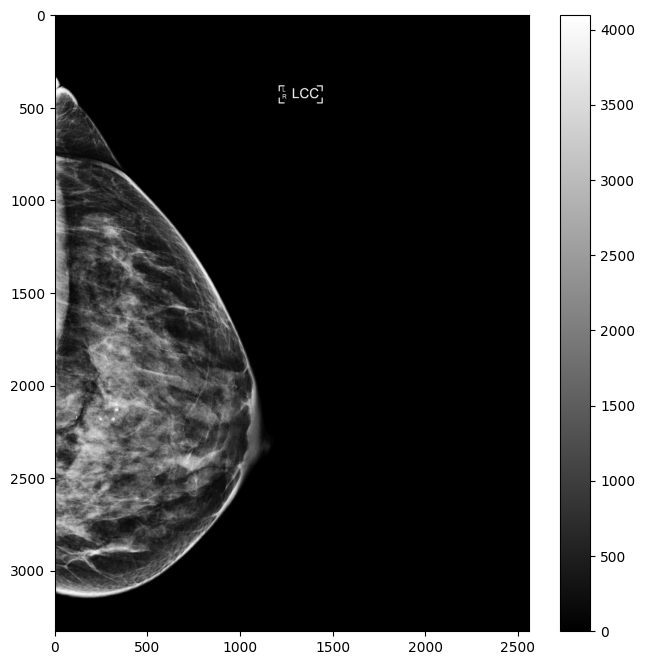

In [67]:
plt.figure(figsize=(8,8))
plt.imshow(array2D,cmap='gray')
plt.colorbar()
plt.show()

**Leemos la información anexa de la imagen DICOM**

En nuestro archivo la imagen esta anonimizada, pero en otros casos contiene los datos del paciente.
Y en todos contiende la resolución espacial (tamaño del pixel en la vida real), datos del equipo, la institución que tomó la imagen, etc. etc...

In [68]:
ds = pydicom.dcmread(nombre_archivo,force=True)
print('Nombre del paciente: ',ds.PatientName)
print('Contiene implante mamario: ',ds.BreastImplantPresent)
print('Tipo de mamografía: ',ds.ProtocolName) #Significado: mama izquierda (L=Left), proyección Craneo Caudal (CC)
print('Distancia vertical (de una fila a otra) y horizontal (de una columna a otra) del centro de un pixel a otro (en mm):', ds.PixelSpacing)

Nombre del paciente:  Unknown1^Unknown1
Contiene implante mamario:  NO
Tipo de mamografía:  L CC
Distancia vertical (de una fila a otra) y horizontal (de una columna a otra) del centro de un pixel a otro (en mm): [0.065238, 0.065238]


Más info sobre la distancia entre pixeles en: https://dicom.innolitics.com/ciods/rt-dose/image-plane/00280030
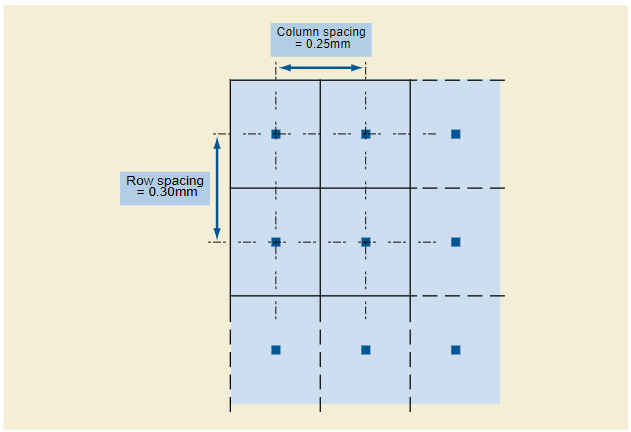

In [69]:
print(ds) #toda la información adicional

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113845.13.4077.2393457793.84272914907
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113845.1.1
(0002, 0013) Implementation Version Name         SH: 'Syn3,2,1,111'
(0002, 0016) Source Application Entity Title     AE: 'DIRECT_DIGXRAY03'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0014) Instance Creator UID                UI: 1.2.840.113681.289

#Recortamos una subimagen

Volvemos a la imagan digital y recortamos una parte de la imagen

El tamaño de la subimagen es: (2900, 1200)


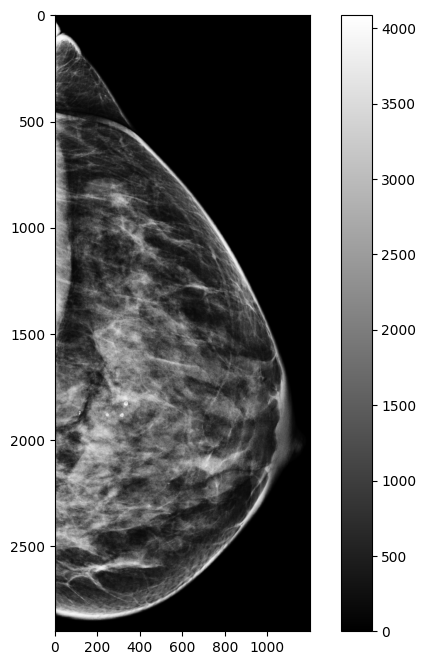

In [ ]:
subimagen=array2D[300:3200,0:1200]
plt.figure(figsize=(8,8))
plt.imshow(subimagen,cmap='gray')
plt.colorbar()
print('El tamaño de la subimagen es:',subimagen.shape)


# Rango dinámico de una imagen
Es el rango de valores posibles de la imagen.

¿Cuál es el rango dinámico de la subimagen recortada?


In [ ]:
max = subimagen.max()
min = subimagen.min()
print(min,max)
print(np.amin(subimagen),np.amax(subimagen))

0 4087
0 4087


Repetir para la imagen completa

## Cambiamos el rango dinámico
Cambiamos la escala de intensidades de la subimagen

Tipo de dato en cada lugar: float64


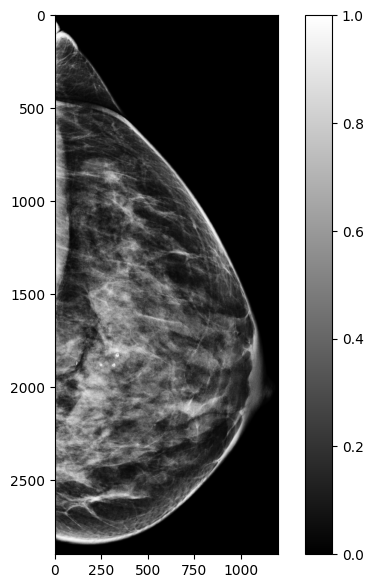

In [ ]:
#Ahora dividimos por el maximo, lugar a lugar. llevando el máximo brillo de la imagen a 1

subimagen_f=array2D[300:3200,0:1200]/max #cambio de escala de z, de los valores, las intensidades. #probar esta operación usando la variable "subimagen"

print('Tipo de dato en cada lugar:', subimagen_f.dtype) #pasó a float

plt.figure(figsize=(7,7))
plt.imshow(subimagen_f,cmap='gray')
plt.colorbar()
plt.show()

¿Cuál es el Rango dinámico de subimagen_f ?

#Transformaciones Espaciales Geométricas

- Traslación 
- Rotación 
- Escala


Ver más info en http://datahacker.rs/003-how-to-resize-translate-flip-and-rotate-an-image-with-opencv/

## **Traslación**

Dada la matriz $M=\begin{pmatrix}
1 & 0 & a\\ 
0 & 1 & b \\
0 & 0 & 1
\end{pmatrix}$, la traslación del pixel $(i, j)$ al pixel $(i+ a, j + b)$ esta dado por la función 
$$
T(i,j)= M \begin{pmatrix} i \\j \\ 1 \end{pmatrix}= \begin{pmatrix}
1 & 0 & a\\ 
0 & 1 & b\\
0& 0 & 1
\end{pmatrix} \begin{pmatrix} i \\j \\ 1 \end{pmatrix}
$$


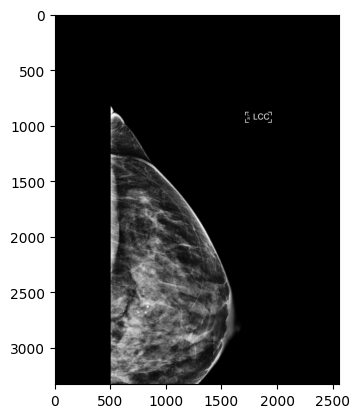

In [ ]:
fil, col = array2D.shape #tamaño del arreglo

#completar:

#En álgebra:
# Valores negativos en a van a mover la imagen hacia -->
# Valores positivos en a van a mover la imagen hacia -->
# Valores negativos en b van a mover la imagen hacia -->
# Valores positivos en b van a mover la imagen hacia -->

#En Python:
# Valores negativos en a van a mover la imagen hacia -->
# Valores positivos en a van a mover la imagen hacia -->
# Valores negativos en b van a mover la imagen hacia -->
# Valores positivos en b van a mover la imagen hacia -->

#hay diferencias? por qué?

#Ejemplo de python
Mt = np.float32([[1, 0, 500], [0, 1, 500]]) #matriz de traslación sin la última fila
transladada = cv2.warpAffine(array2D, Mt, (col, fil)) #imagen, matriz de traslación, tamaño de la imagen final
plt.imshow(transladada,cmap='gray')

## **Rotación**

Dada la matriz $M=\begin{pmatrix}
\cos(\alpha) & -\sin(\alpha)& 0\\ 
\sin(\alpha) & \cos(\alpha)& 0\\
0 & 0 & 1
\end{pmatrix} $ la rotación del pixel $(i, j)$, alrededor del origen de coordenadas, un ángulo $\alpha$ esta dado por la transformación lineal 

$$
T(i,j)= M \begin{pmatrix} i \\ j \\ 1\end{pmatrix}.
$$

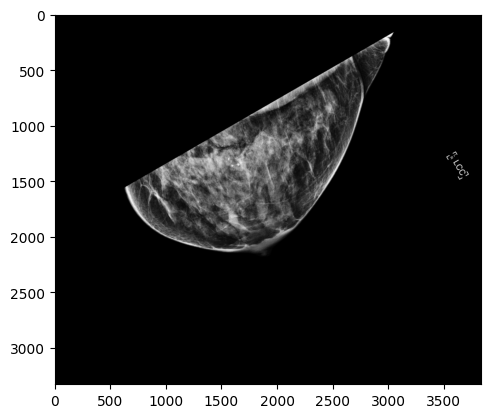

In [ ]:
#Aplicamos el concepto "a mano"
fil, col = array2D.shape #tamaño del arreglo
#alpha=60°

Mrt = np.float32([[0.5, -0.866, fil], [0.866, 0.5, 0]]) #matriz de rotación y traslación (para que podamos ver la imagen) sin la última fila
rotada_trasladada = cv2.warpAffine(array2D, Mrt, (col+col//2, fil)) #imagen, matriz de rotación y traslación, tamaño de la imagen final 
                                                                    #(le agregamos más columnas para verla entera)
plt.imshow(rotada_trasladada,cmap='gray')

Matiz para rotación 
 [[ 0.5        0.8660254  0.       ]
 [-0.8660254  0.5        0.       ]]


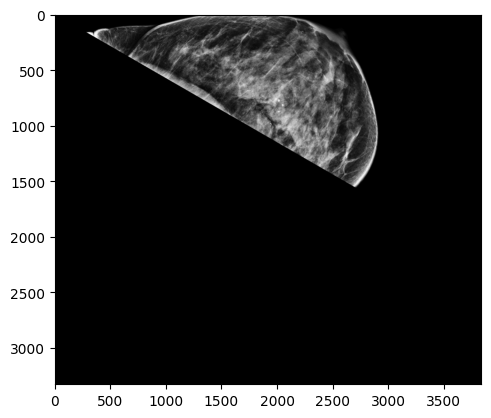

In [ ]:
#Obtener Matriz de rotación (y escala) con función propia de cv2 Rotation Matrix
alpha=60 #ángulo
Mr = cv2.getRotationMatrix2D((0,0),alpha,1)   #(0,0), indican que la rotación se haga desde el origen de coordenandas, sin escala: 1. 
                                              #Observar diferencias con álgebra en la matriz. Por qué será?

print('Matiz para rotación', '\n',Mr) #prueben de cambiar el ángulo de rotación

rotadaCV2 = cv2.warpAffine(array2D, Mr, (col+col//2, fil)) #imagen, matriz de rotación, tamaño de la imagen final (le agregamos más columnas para verla entera)
plt.imshow(rotadaCV2,cmap='gray')

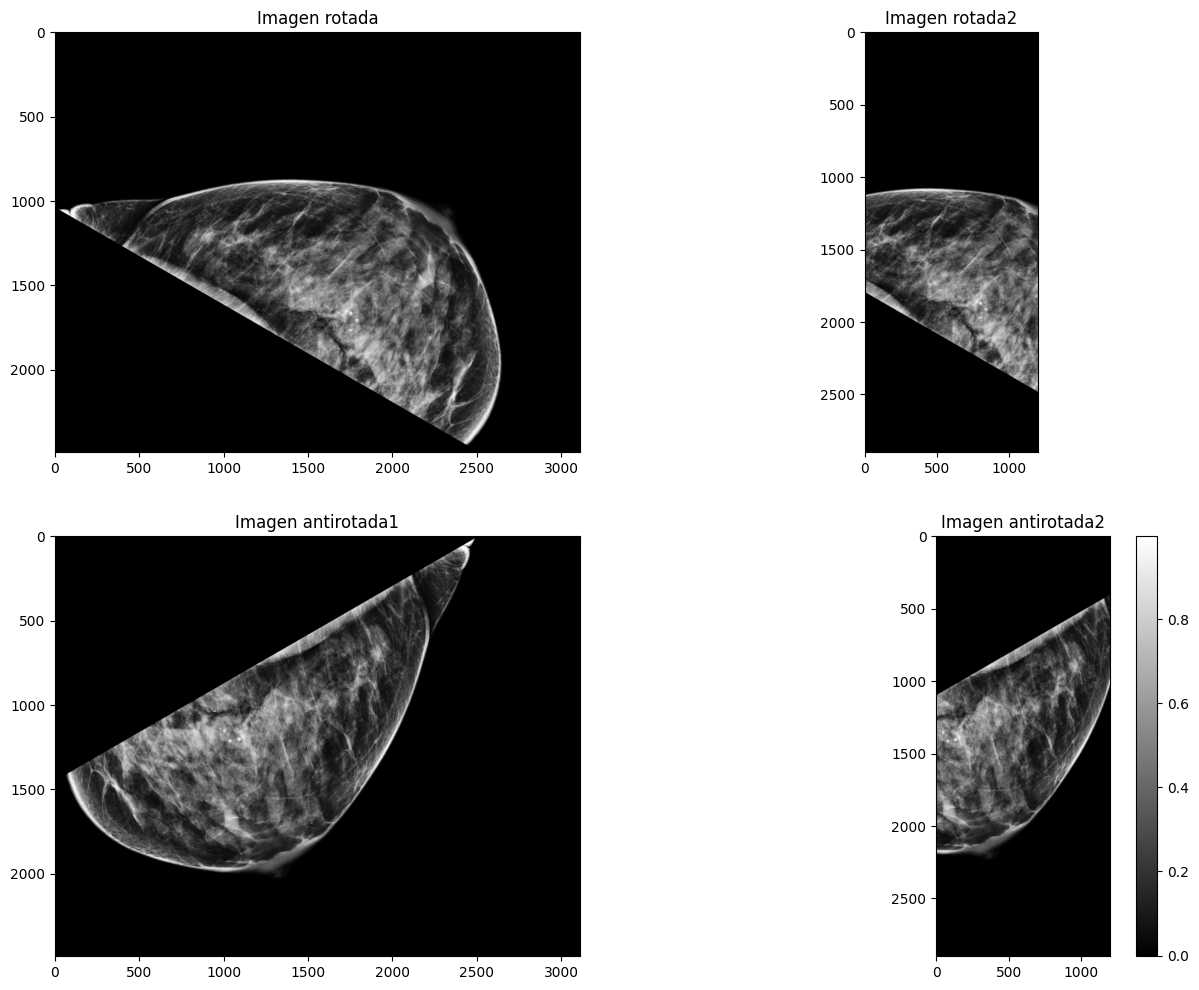

In [ ]:
#Utilizar función rotate de la librería scipy

alpha=60
rotada1 = rotate(subimagen_f,alpha) #Se mantiene la escala y se adapta el arreglo de salida para que se pueda ver toda la imagen
rotada2 = rotate(subimagen_f,alpha,reshape=False) #con reshape=False no se adapta el arreglo de salida para que se pueda ver toda la imagen
antirotada1=rotate(subimagen_f,-alpha)
antirotada2=rotate(subimagen_f,-alpha,reshape=False)

plt.figure(figsize=(15,12))

plt.subplot(221),plt.imshow(rotada1,cmap='gray'), plt.title('Imagen rotada')
plt.subplot(222),plt.imshow(rotada2,cmap='gray'), plt.title('Imagen rotada2')
plt.subplot(223),plt.imshow(antirotada1,cmap='gray'), plt.title('Imagen antirotada1')
plt.subplot(224),plt.imshow(antirotada2,cmap='gray'), plt.title('Imagen antirotada2')

plt.colorbar()
plt.show()

## Escala

$M=\begin{bmatrix}
\rho & 0 & 0\\ 
0 & \rho & 0\\ 
0 & 0 & 1
\end{bmatrix} $  o $M=\begin{bmatrix}
\rho_1 & 0 & 0\\ 
0 & \rho_2 & 0\\ 
0 & 0 & 1
\end{bmatrix} $ Matrices para **Escala**,

tamaño del arreglo original: (2900, 1200)
Matriz de escalado: 
 [[3. 0. 0.]
 [0. 1. 0.]]


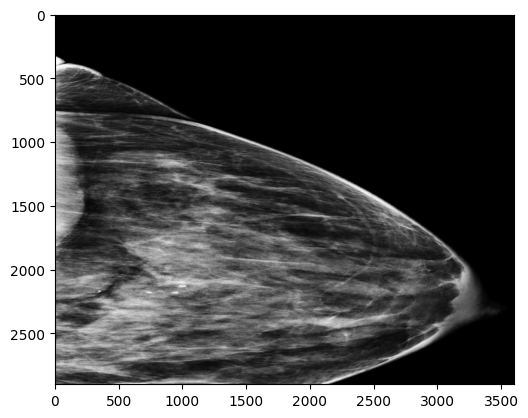

In [ ]:
#Aplicamos el concepto "a mano"
fil_s, col_s = subimagen_f.shape #tamaño del arreglo
print('tamaño del arreglo original:',(fil_s, col_s))
#Escala en filas=2
#Escala en columnas=4
ec=3
ef=1

Me = np.float32([[ec, 0, 0], [0, ef, 0]]) #matriz para escalado sin la última fila
escalada = cv2.warpAffine(array2D, Me, (col_s*ec, fil_s)) #imagen, matriz de rescalado, tamaño de la imagen final 

print('Matriz de escalado:', '\n', Me)

plt.imshow(escalada,cmap='gray')

Matriz de escalado: 
 [[ 2.  0. -0.]
 [-0.  2.  0.]]


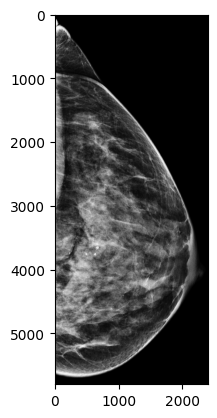

In [ ]:
#Obtener Matriz de (rotación y) escala con cv2 Rotation Matrix
M2 = cv2.getRotationMatrix2D((0,0),0,2) # sin rotación:0, escala: rho=2

escaladaCV2 = cv2.warpAffine(subimagen_f, M2, (col_s*2, fil_s*2)) #imagen, matriz de rescalado, tamaño de la imagen final 

print('Matriz de escalado:', '\n', M2)

plt.imshow(escaladaCV2,cmap='gray')

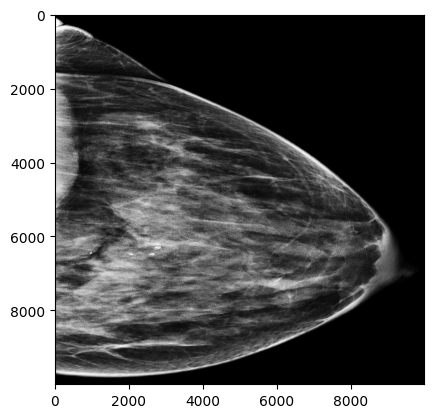

In [ ]:
#Utilizando resize --> quiero un tamaño específico

# Rescalo para obtener una imagen de 10000 x 10000
escalada_resize = cv2.resize(subimagen_f, (10000, 10000))
plt.imshow(escalada_resize,cmap='gray')

#cual es el problema?
#como lo soluciono?

## Rotación y escala (al mismo tiempo)

Matiz para rotación 
 [[ 0.5        0.8660254  0.       ]
 [-0.8660254  0.5        0.       ]]

 Matriz de escalado: 
 [[ 0.5  0.   0. ]
 [-0.   0.5  0. ]]

 Matriz de rotación y escalado: 
 [[ 0.25       0.4330127  0.       ]
 [-0.4330127  0.25       0.       ]] es el producto de las dos matrices anteriores, sin la última fila


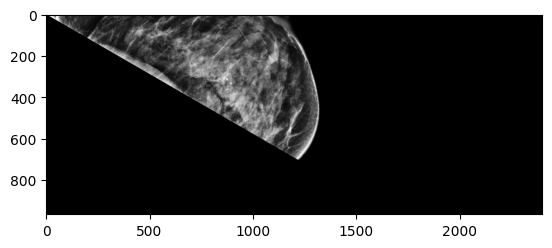

In [ ]:
#Recordamos:
alpha=60 #ángulo
Mr = cv2.getRotationMatrix2D((0,0),alpha,1) 
print('Matiz para rotación', '\n',Mr)

M2 = cv2.getRotationMatrix2D((0,0),0,0.5) #Matriz que usamos para escalar --> sin rotación:0, escala: rho=2
print('\n','Matriz de escalado:', '\n', M2)


#Obtener Matriz de (rotación y) escala 
M3 = cv2.getRotationMatrix2D((0,0),alpha,0.5) # rotación: 60 , escala: rho=0.5
print('\n','Matriz de rotación y escalado:', '\n', M3, 'es el producto de las dos matrices anteriores, sin la última fila')

transformada = cv2.warpAffine(subimagen_f, M3, (col_s*2, fil_s//3))
plt.imshow(transformada,cmap='gray')

## Rotación, escala y traslación (al mismo tiempo)

Recordar que para la composición de transformaciones, se realiza la multiplicación de matrices y para poder hacerlo (y también poder invertir) se agrega la última fila (que siempre es la misma: [0 0 1]). La información relevante está en las dos primeras filas por eso el soft devuelve y pide las dos primeras filas de esa matriz.

La matriz de la composición de rotación, escala y traslación queda: 

 $M=\begin{pmatrix}
\cos(\alpha) \rho_1 & -\sin(\alpha) \rho_2& a\\ 
\sin(\alpha) \rho_1 & \cos(\alpha)\rho_2& b\\
0 & 0 & 1
\end{pmatrix} $ 

[[ 2.50000000e-01 -4.33012702e-01  1.07786842e+03]
 [ 4.33012702e-01  2.50000000e-01  8.27692379e+02]]


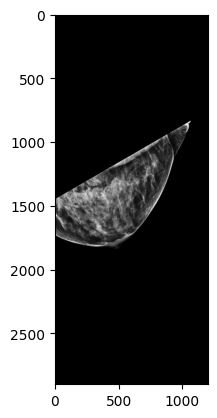

In [ ]:
#Obtener Matriz de rotación, escala (rho1=rho2) y traslación necesaria para fijar el centro de rotación
(height, width)=subimagen_f.shape #cuidado! fila, columna
M4 = cv2.getRotationMatrix2D((width//2,height//2),60,0.5) #width/2,height/2, indican que la rotación se haga desde el centro (//2 implica que dará un número entero)
print(M4)

transformada2 = cv2.warpAffine(subimagen_f, M4, (width, height))
plt.imshow(transformada2,cmap='gray')

Elegimos dos matrices para hacer dos transformaciones diferentes a  **subimagen_f**, usando la función **cv2.warpAffine**

### Ejercicio

a) Obtener un zoom de la subimagen_f

b) Escalar al doble

c) Graficar la imagen original, graficar el zoom sin escalar, graficar el zoom escalado y colocar titulos a cada imagen

## Interpolación

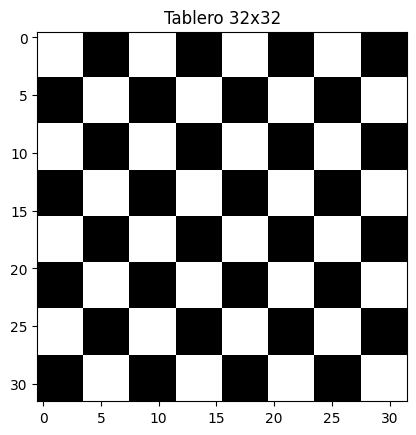

In [ ]:
# Método de interpolación
# Genere la Imagen Tablero (de tamaño 32x32)

B=np.ones((4,4))
N=np.zeros((4,4))

BN = np.concatenate((B,N,B,N,B,N,B,N),axis=1)
NB = np.concatenate((N,B,N,B,N,B,N,B),axis=1)

Tablero = np.concatenate((BN,NB,BN,NB,BN,NB,BN,NB),axis=0)

plt.imshow(Tablero,cmap='gray'), plt.title('Tablero 32x32')
plt.show()

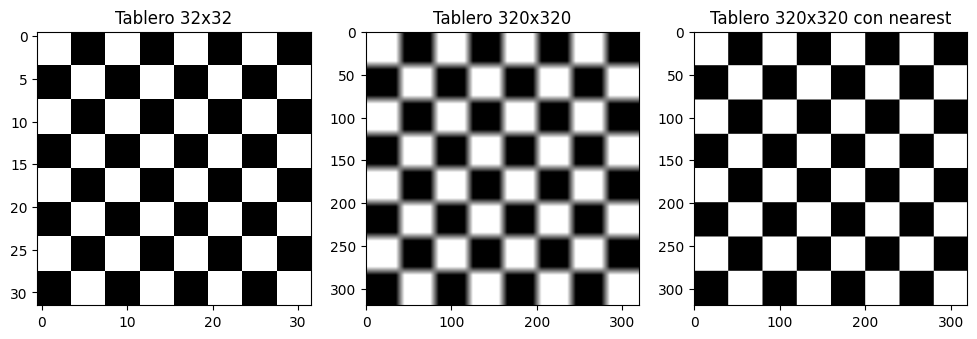

In [ ]:
#Utilice el tablero 32x32 para crear un Tablero de 320x320

h, w = Tablero.shape
p1=p2=10

Tablero320=cv2.resize(Tablero,(w*p1,h*p2))
Tablero320_nearest=cv2.resize(Tablero,(w*p1,h*p2),interpolation = cv2.INTER_NEAREST)#usa INTER_LINEAR por defecto

plt.figure(figsize=(12,10))
plt.subplot(131),plt.imshow(Tablero,cmap='gray'), plt.title('Tablero 32x32')
plt.subplot(132),plt.imshow(Tablero320,cmap='gray'), plt.title('Tablero 320x320')
plt.subplot(133),plt.imshow(Tablero320_nearest,cmap='gray'), plt.title('Tablero 320x320 con nearest')
plt.show()

##¿Qué otras transformaciones espaciales podríamos hacer?
Ejemplo: flippear vertical y horizontalmente, busquen al menos 2 formas de hacerlo para la próxima clase.